Three Trends: 
    1)Uber Trips per city have a much higher ratio (x4) of Urban trips in comparison to Rural Trips.
    2)Uber Trips in Rural locations are more costly but less frequent in comparison to the trips in more populated and urban areas.
    3)Due to popularity and trends 1 and 2, there will be less drivers per city type in a Rural setting rather than Suburban and Urban (pie chart 3). 

In [2]:
#Dependencies
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
#Import CSV Data
#Location Path
file1='../raw_data/ride_data.csv'
file2='../raw_data/city_data.csv'

#Reading CSV as DF
ride_df=pd.read_csv(file1)
city_df=pd.read_csv(file2)

#Showing 'Ride_Data.Csv'
ride_df.head(5)

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
#Showing 'City_Data.Csv'
city_df.head(5)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
#Merging CSVs, DFs into One and Sorting by City
merged_df = pd.merge(city_df,ride_df,on="city",how="outer")
merged_df = merged_df.sort_values("city")
merged_df.head()

,city,driver_count,type,date,fare,ride_id
1523,Amandaburgh,12,Urban,2018-01-11 02:22:07,29.24,7279902884763
1522,Amandaburgh,12,Urban,2018-02-10 20:42:46,36.17,6455620849753
1529,Amandaburgh,12,Urban,2018-03-13 12:52:31,13.88,6222134922674
1524,Amandaburgh,12,Urban,2018-01-21 04:12:54,9.26,5528427024492
1525,Amandaburgh,12,Urban,2018-04-19 16:30:12,6.27,4400632718421


In [6]:
#Separating CITY_DF Data, by City Type Only , URBAN
urban_city_df = city_df.loc[city_df["type"]=="Urban"]
urban_city_df.sort_values("city")
#Calculating Driver Count Per City, URBAN
urban_drivers = urban_city_df["driver_count"].tolist()
urban_drivers = [each*5 for each in urban_drivers]
urban_city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [7]:
#Separating CITY_DF Data, by City Type Only , URBAN
rural_city_df = city_df.loc[city_df["type"]=="Rural"]
rural_city_df.sort_values("city")
#Calculating Driver Count Per City, RURAL
rural_drivers = rural_city_df["driver_count"].tolist()
rural_drivers = [each*5 for each in rural_drivers]
rural_drivers
rural_city_df.head()

,city,driver_count,type
102,South Jennifer,7,Rural
103,West Heather,4,Rural
104,Newtonview,1,Rural
105,North Holly,8,Rural
106,Michaelberg,6,Rural


In [8]:
#Separating CITY_DF Data, by City Type Only , SUBURBAN
suburban_city_df = city_df.loc[city_df["type"]=="Suburban"]
suburban_city_df.sort_values("city")
#Calculating Driver Count Per City, SUBURBAN
suburban_drivers= suburban_city_df["driver_count"].tolist()
suburban_drivers = [each*5 for each in suburban_drivers]
suburban_city_df.head()

,city,driver_count,type
66,Port Shane,7,Suburban
67,Lake Ann,3,Suburban
68,Lake Scott,23,Suburban
69,Colemanland,23,Suburban
70,New Raymond,17,Suburban


In [9]:
#Summarizing MERGED_DF by CITY TYPE, URBAN
urban_df = merged_df.loc[merged_df["type"]=="Urban"]
urban_df.sort_values("city")
#Calculating number of Rides/City and Average Fare/City, URBAN
#Grouping Data by City
urban_group = urban_df.groupby("city")

urban_rides_df = urban_group["type"].count()
urban_rides_df

urban_average_fare_df = round(urban_group["fare"].mean(),2)
urban_average_fare_df

city
Amandaburgh             24.64
Barajasview             25.33
Carriemouth             28.31
Christopherfurt         24.50
Deanville               25.84
East Kaylahaven         23.76
Erikaland               24.91
Grahamburgh             25.22
Huntermouth             28.99
Hurleymouth             25.89
Jerryton                25.65
Johnton                 26.79
Joneschester            22.29
Justinberg              23.69
Karenberg               26.34
Karenside               27.45
Lake Danielberg         24.84
Lake Jonathanshire      23.43
Lake Scottton           23.81
Leahton                 21.24
Liumouth                26.15
Loganberg               25.29
Martinezhaven           22.65
New Jacobville          26.77
New Kimberlyborough     22.59
New Paulton             27.82
New Paulville           21.68
North Barbara           23.49
North Jasmine           25.21
North Jason             22.74
                        ...  
Port Johnbury           23.01
Port Samanthamouth      25.64
Raymo

In [10]:
#Summarizing MERGED_DF by CITY TYPE,RURAL
rural_df = merged_df.loc[merged_df["type"]=="Rural"]
rural_df.sort_values("city")

#Calculating number of Rides/City and Average Fare/City, RURAL
#Grouping Data by City
rural_group=rural_df.groupby("city")
rural_rides_df = rural_group["type"].count()
rural_rides_df

rural_average_fare_df = round(rural_group["fare"].mean(),2)
rural_average_fare_df

city
Bradshawfurt         40.06
Garzaport            24.12
Harringtonfort       33.47
Jessicaport          36.01
Lake Jamie           34.36
Lake Latoyabury      26.06
Michaelberg          35.00
New Ryantown         43.28
Newtonview           36.75
North Holly          29.13
North Jaime          30.80
Penaborough          35.25
Randallchester       29.74
South Jennifer       35.26
South Marychester    41.87
South Saramouth      36.16
Taylorhaven          42.26
West Heather         33.89
Name: fare, dtype: float64

In [11]:
#Summarizing MERGED_DF by CITY TYPE, SUBURBAN
suburban_df = merged_df.loc[merged_df["type"]=="Suburban"]
suburban_df.sort_values("city")
#Calculating number of Rides/City and Average Fare/City, SUBURBAN
#Grouping Data by City
suburban_group = suburban_df.groupby("city")

suburban_rides_df = suburban_group["type"].count()
suburban_rides_df

suburban_average_fare_df = round(suburban_group["fare"].mean(),2)
suburban_average_fare_df

city
Barronchester         36.42
Bethanyland           32.96
Brandonfort           35.44
Colemanland           30.89
Davidfurt             32.00
East Aaronbury        25.66
East Danielview       31.56
East Kentstad         29.82
East Marymouth        30.84
Grayville             27.76
Josephside            32.86
Lake Ann              30.89
Lake Omar             28.07
Lake Robertside       31.26
Lake Scott            31.89
Lewishaven            25.24
Lewisland             34.61
Mezachester           30.76
Myersshire            30.20
New Olivia            34.05
New Raymond           27.96
New Shannonberg       28.38
Nicolechester         30.91
North Jeffrey         29.24
North Richardhaven    24.70
North Timothy         31.26
Port Shane            31.08
Rodriguezview         30.75
Sotoville             31.98
South Brenda          33.96
South Teresa          31.22
Veronicaberg          32.83
Victoriaport          27.78
West Hannah           29.55
West Kimmouth         29.87
Williamsonville

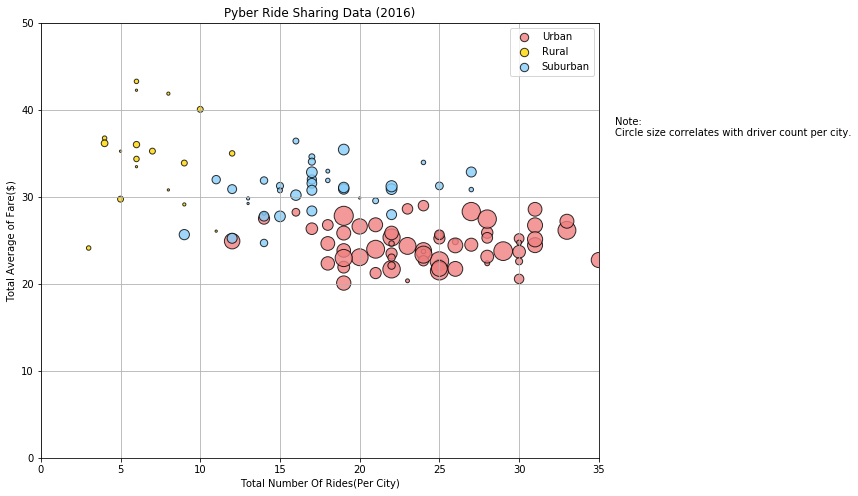

In [12]:
#Place relevant data into scatterplot to access trend
#Grouped by City Type 
#URBAN
fig = plt.figure(figsize=(10,8))
plt.grid(True)
sct_urban = plt.scatter(x=urban_rides_df,y=urban_average_fare_df,marker="o",
                        color="lightcoral",s=10*urban_drivers,edgecolor='black', linewidths=1,alpha=0.8,label="Urban")
#RURAL
sct_rural = plt.scatter(x=rural_rides_df,y=rural_average_fare_df,marker="o",
                        color="gold",s=10*rural_drivers,edgecolor='black',linewidths=1,alpha=0.8,label="Rural")
#SUBURBAN
sct_sub = plt.scatter(x=suburban_rides_df,y=suburban_average_fare_df,marker="o",
                      color="lightskyblue",s=10*suburban_drivers,edgecolor='black',linewidths=1,alpha=0.8,label="Suburban")

#LEGENDS, SET SIZE FOR LEGEND +HANDLES
lgnd = plt.legend(handles=[sct_urban,sct_rural,sct_sub],loc="best")
lgnd.legendHandles[0]._sizes = [70]
lgnd.legendHandles[1]._sizes = [70]
lgnd.legendHandles[2]._sizes = [70]

#ADD IN TEXT FOR EXPLANATION OF BUBBLE SIZE
plt.text(36,37,'Note:\nCircle size correlates with driver count per city.',fontsize=10)

#LIMITS, X AND Y
plt.xlim(0,35)
plt.ylim(0,50)

#LABEL AND TITLE
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number Of Rides(Per City)")
plt.ylabel("Total Average of Fare($)")

plt.show()

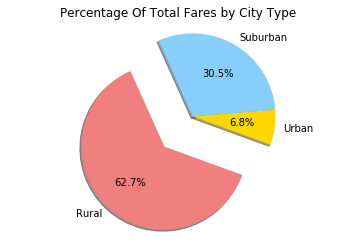

In [27]:
#Pie Chart, 1,Total Fares by City Type
#Calculating TOTAL FARE for ALL CITIES
fare_total = round(ride_df["fare"].sum(),2)

#Calculating Total Fare from Merged_df, Grouping By Type to find Fares Percentage Per Type
city_grouped_type = merged_df.groupby("type")
fare_total_type = city_grouped_type["fare"].sum()

#Calculating Percentage of Total Fare for Each TYPE
percent_fare_type = [(x/fare_total)*100 for x in fare_total_type]
percent_fare_type
labels = ["Urban", "Suburban", "Rural"]
percent_fare_type
colors = ["Gold", "lightskyBlue", "lightCoral"]
explode = [0, 0, 0.5]
plt.pie(percent_fare_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=340)
plt.title("Percentage Of Total Fares by City Type")
plt.axis("equal")
plt.show()

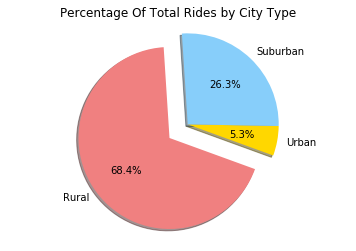

In [25]:
#Pie Chart, 2, Total Rides by City Type

#Calculating Total RIDES for All Cities
ride_total= ride_df["ride_id"].count()

#Calculating Total Fare for RIDES PER CITY TYPE
ride_total_type = city_grouped_type["ride_id"].count()
ride_total_type

#Calculating Percentage of Total Fare for Each TYPE
percent_ride_type = [(x/ride_total)*100 for x in ride_total_type]
percent_ride_type
labels = ["Urban", "Suburban", "Rural"]
percent_ride_type
colors = ["Gold", "lightskyBlue", "lightCoral"]
explode = [0, 0, 0.25]
plt.pie(percent_ride_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=340)
plt.title("Percentage Of Total Rides by City Type")
plt.axis("equal")
plt.show()


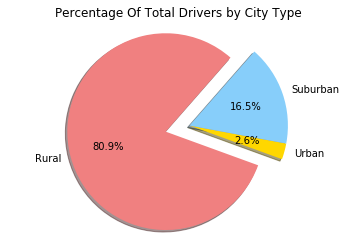

In [26]:
#PIE chart, 3, Total Drivers by City Type

driver_total = city_df["driver_count"].sum()

# total drivers for urban
# groupby city type and city
city_grouped_type_city = city_df.groupby("type")
driver_total_type = city_grouped_type_city["driver_count"].sum()

#Calculating Percentage of DRIVERS PER CITY TYPE
percent_drivers_type = [(x/driver_total)*100 for x in driver_total_type]
percent_drivers_type
labels = ["Urban", "Suburban", "Rural"]
percent_drivers_type
colors = ["Gold", "lightskyBlue", "lightCoral"]
explode = [0, 0, 0.25]
plt.pie(percent_drivers_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=340)
plt.title("Percentage Of Total Drivers by City Type")
plt.axis("equal")
plt.show()